In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from jcopml.time_series.decomposition import additive_decomposition, multiplicative_decomposition

from luwiji.time_series import illustration

# Champagne Sales

Pada project kali ini saya ingin mengetahui jumlah penjualan minuman setiap bulan untuk beberapa tahun kedepan

In [13]:
df_champagne = pd.read_csv('data/perrin_freres_champagne.csv', index_col='date', parse_dates=['date'])
df_champagne.head()

,sales
date,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [14]:
series = df_champagne.sales
X_train, X_test = series[:-30], series[-30:]

<AxesSubplot:xlabel='date'>

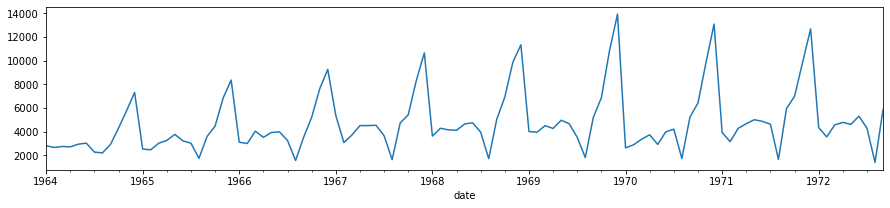

In [15]:
series.plot(figsize=(15,3))

`Bisa dilihat, ternyata data penjualan champagne ini tidak terlihat trendnya dan terdapat fluktuasi yang semakin melemah pada suatu periode (seasonality) tertentu.`

Dan karena semakin melemah, maka jika dijadikan data test kemungkinan prediksinya akan gagal.

# Training 

In [16]:
es = ExponentialSmoothing (X_train, seasonal='mul', seasonal_periods=12)
model = es.fit(optimized=True, use_boxcox=True)

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(


`Di sini menggunakan 'multiplicative' terhadap seasonalitynya karena terdapat fluktuasi yang signifikan di dalam datanya.`

# Forecasting

In [17]:
pred = model.predict(len(X_train)-15, len(X_train)+50)

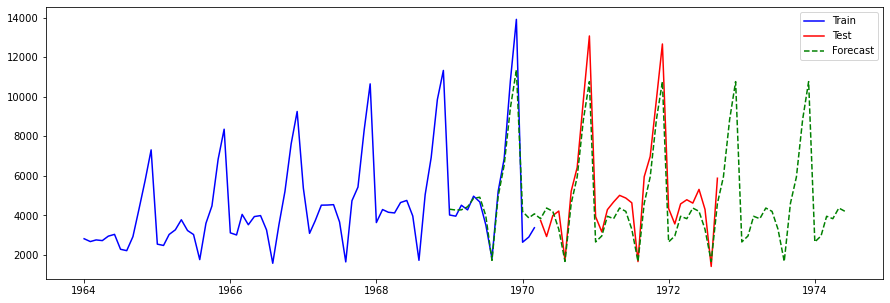

In [18]:
plt.figure(figsize=(15,5))
plt.plot(X_train, 'b-', label = 'Train')
plt.plot(X_test, 'r-', label='Test')
plt.plot(pred, 'g--', label='Forecast')
plt.legend()

`Berdasarkan hasil visualisasinya, ternyata model ini belum cukup baik dalam melakukan forecasting terhadap penjualan minuman seperti yang sudah diduga sebelumnya.`